In [20]:
#Import Needed Libraries
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('Emotions.csv')
#Data Set credit to NIDULA ELGIRIYEWITHANA on Kaggle

In [5]:
print(df.head(20))
print(df.shape)

    Unnamed: 0                                               text  label
0            0      i just feel really helpless and heavy hearted      4
1            1  ive enjoyed being able to slouch about relax a...      0
2            2  i gave up my internship with the dmrg and am f...      4
3            3                         i dont know i feel so lost      0
4            4  i am a kindergarten teacher and i am thoroughl...      4
5            5         i was beginning to feel quite disheartened      0
6            6  i would think that whomever would be lucky eno...      2
7            7  i fear that they won t ever feel that deliciou...      1
8            8  im forever taking some time out to have a lie ...      5
9            9  i can still lose the weight without feeling de...      0
10          10  i try to be nice though so if you get a bitchy...      1
11          11  im feeling a little like a damaged tree and th...      0
12          12  i have officially graduated im not 

In [6]:
# Select a random sample from the dataset
sample = df.sample(n=1)

# Extract the text and corresponding label
sample_text = sample['text'].values[0]
sample_label = sample['label'].values[0]

print("Sample Twitter Message:", sample_text)
print("Corresponding Emotion Label:", sample_label)

Sample Twitter Message: i feel helpless in the face of this beast insecurity
Corresponding Emotion Label: 0


In [7]:
emotion_label = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
df['emotion'] = df['label'].map(emotion_label)
#Converting the numbers into emotions

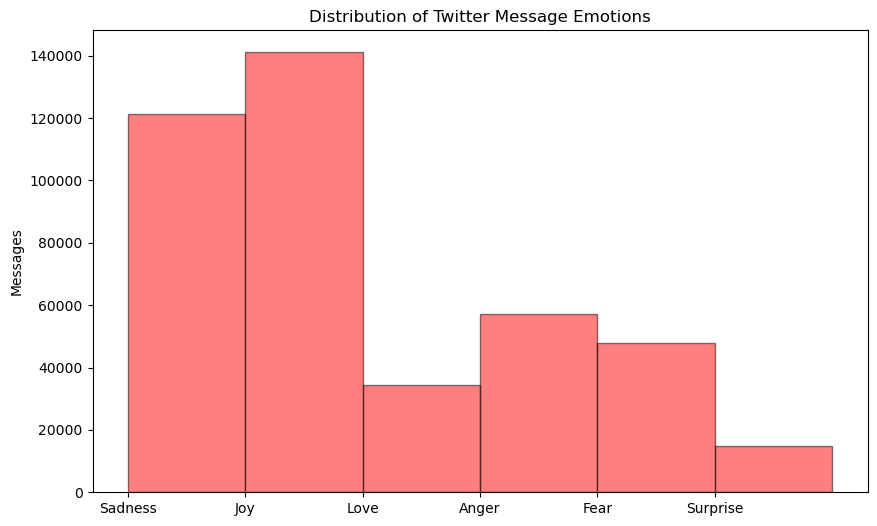

([<matplotlib.patches.Wedge at 0x1b83fb5a410>,
 [Text(0.5346311399815906, 0.9613373727063693, 'Joy'),
  Text(-1.094320513809138, 0.11163607417185745, 'Sadness'),
  Text(-0.35335482379565897, -1.041700709657212, 'Anger'),
  Text(0.49287158365129397, -0.983401038248926, 'Fear'),
  Text(0.9725585872591405, -0.5139355935800762, 'Love'),
  Text(1.0930034182792234, -0.12386899381981457, 'Surprise')],
 [Text(0.29161698544450393, 0.5243658396580196, '33.8%'),
  Text(-0.5969020984413479, 0.060892404093740415, '29.1%'),
  Text(-0.19273899479763215, -0.5682003870857519, '13.8%'),
  Text(0.2688390456279785, -0.5364005663175959, '11.4%'),
  Text(0.5304865021413493, -0.2803285055891324, '8.3%'),
  Text(0.5961836826977581, -0.06756490571989884, '3.6%')])

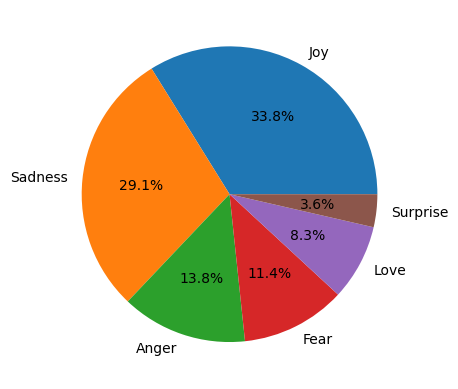

In [18]:
import matplotlib.pyplot as plt
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of emotions using a histogram
plt.hist(df['label'], bins=range(7), color='red', edgecolor='black', alpha=0.5)

# Set the title and labels
plt.title('Distribution of Twitter Message Emotions')
plt.ylabel('Messages')

# Set x-axis ticks and labels
plt.xticks(range(6), ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])

# Display the plot
plt.show()

#Pie Chart to Show Percentages
labels= 'Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprise'
emotion_counts = df['label'].value_counts()
plt.pie(emotion_counts, labels = labels,  autopct='%1.1f%%')

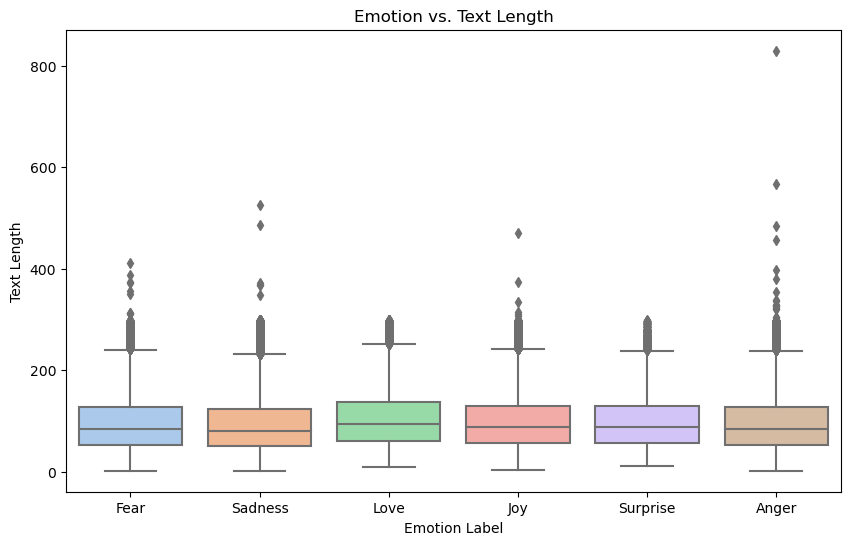

In [65]:
df['text_length'] = df['text'].apply(len)
emotion_label2 = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
df['emotion'] = df['label'].map(emotion_label2)
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'emotion', y='text_length', data=df, palette='pastel')
plt.title('Emotion vs. Text Length')
plt.xlabel('Emotion Label')
plt.ylabel('Text Length')
plt.show()
#Showing Emotions in terms of text length using a box plot

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

#Train Test Split to Begin Data Training
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=0)
#Transform text into a vector based on frequency
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
#Train the XGB model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=6, random_state=42) #random state to 42 for same testing
xgb_model.fit(X_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [51]:
#Assign y_pred with the predictions from the xgb model
y_pred = xgb_model.predict(X_test_vec)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.8944483097814352

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     23935
           1       0.92      0.89      0.91     28390
           2       0.75      0.93      0.83      6964
           3       0.93      0.86      0.90     11641
           4       0.86      0.86      0.86      9443
           5       0.69      0.94      0.80      2989

    accuracy                           0.89     83362
   macro avg       0.85      0.90      0.87     83362
weighted avg       0.90      0.89      0.90     83362


Confusion Matrix:
 [[21732  1004   140   364   561   134]
 [  375 25379  1944   166   195   331]
 [   65   373  6465    22    19    20]
 [  637   389    60 10065   458    32]
 [  138   268    33   149  8105   750]
 [   17    65    18     5    67  2817]]


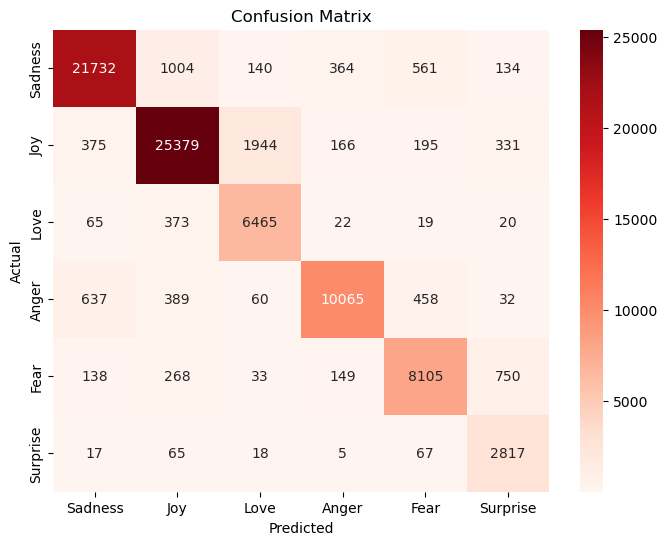

In [53]:
def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred, labels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])

In [ ]:
#The results are logially sound. Many surprises can also be interpreted as fear, Love and Joy are closely related, etc.
#Joy predictions actually being Sadness can likely be attributed to 2 things: 
#The signifcant volume that Joy and Sadness have when compared to other emotions, and these emotions having this most contradiction despite being able to co-exist. Something that is hard to distinguish for an algorithim.